<a href="https://colab.research.google.com/github/yuaquintero/U4-Project-CNN/blob/master/CNN_Scene_clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import os
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dropout, Flatten, Dense, Activation
from tensorflow.python.keras.layers import  Convolution2D, MaxPooling2D
from tensorflow.python.keras import backend as K
import cv2

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [8]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1jbfOzGcyVwnePM_LPXo2zgaUM8hkJc8q' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1jbfOzGcyVwnePM_LPXo2zgaUM8hkJc8q" -O intel-image-classification.zip && rm -rf /tmp/cookies.txt

--2020-04-29 19:50:28--  https://docs.google.com/uc?export=download&confirm=6GWa&id=1jbfOzGcyVwnePM_LPXo2zgaUM8hkJc8q
Resolving docs.google.com (docs.google.com)... 74.125.31.138, 74.125.31.113, 74.125.31.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.31.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-2s-docs.googleusercontent.com/docs/securesc/5hgcfe66pdc65tqggpu3g8cun13t4867/uv2pa8ov0rm8auo11ou85fai4mdrc90o/1588189800000/12257531938772176428/05677738371567320668Z/1jbfOzGcyVwnePM_LPXo2zgaUM8hkJc8q?e=download [following]
--2020-04-29 19:50:28--  https://doc-04-2s-docs.googleusercontent.com/docs/securesc/5hgcfe66pdc65tqggpu3g8cun13t4867/uv2pa8ov0rm8auo11ou85fai4mdrc90o/1588189800000/12257531938772176428/05677738371567320668Z/1jbfOzGcyVwnePM_LPXo2zgaUM8hkJc8q?e=download
Resolving doc-04-2s-docs.googleusercontent.com (doc-04-2s-docs.googleusercontent.com)... 74.125.141.132, 2607:f8b0:400c:c06::84
Connecting to 

https://drive.google.com/file/d/1jbfOzGcyVwnePM_LPXo2zgaUM8hkJc8q/view?usp=sharing

In [9]:
!mkdir data
!unzip intel-image-classification.zip -d data/
!ls -a

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: data/seg_train/seg_train/mountain/7539.jpg  
  inflating: data/seg_train/seg_train/mountain/7551.jpg  
  inflating: data/seg_train/seg_train/mountain/7560.jpg  
  inflating: data/seg_train/seg_train/mountain/7565.jpg  
  inflating: data/seg_train/seg_train/mountain/7578.jpg  
  inflating: data/seg_train/seg_train/mountain/7581.jpg  
  inflating: data/seg_train/seg_train/mountain/7586.jpg  
  inflating: data/seg_train/seg_train/mountain/7647.jpg  
  inflating: data/seg_train/seg_train/mountain/7652.jpg  
  inflating: data/seg_train/seg_train/mountain/7654.jpg  
  inflating: data/seg_train/seg_train/mountain/7662.jpg  
  inflating: data/seg_train/seg_train/mountain/767.jpg  
  inflating: data/seg_train/seg_train/mountain/7672.jpg  
  inflating: data/seg_train/seg_train/mountain/7679.jpg  
  inflating: data/seg_train/seg_train/mountain/7681.jpg  
  inflating: data/seg_train/seg_train/mountain/7693.jpg  
  inflating:

In [0]:
data_train = './data/seg_train/seg_train'
data_test = './data/seg_test/seg_test'

# Prepare data

In [0]:
ImageHeight, ImageWeithg= 150, 150
classes=6

Generer data train

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [13]:
train_gen= train_datagen.flow_from_directory(
    data_train,
    target_size=(ImageHeight, ImageWeithg),
    batch_size=32,
    class_mode='categorical')


Found 14034 images belonging to 6 classes.


Generer data test

In [0]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [64]:
test_gen = test_datagen.flow_from_directory(
    data_test,
    target_size=(ImageHeight, ImageWeithg),
    batch_size=32,
    class_mode='categorical')

Found 3000 images belonging to 6 classes.


In [18]:
from keras.preprocessing.image import load_img, img_to_array
import os

Using TensorFlow backend.


## Convert images into array

In [0]:
def get_images(directory):
    Images = []
    Labels = [] 
    for labels in os.listdir(directory):
         if labels == 'buildings':
            label = 0
         elif labels == 'forest':
            label = 1   
         elif  labels == 'glacier': 
            label = 2
         elif labels == 'mountain':
            label = 3   
         elif labels == 'sea':
            label = 4   
         elif labels == 'street':
            label = 5    
         for image_file in os.listdir(directory+'/'+labels): 
            image = cv2.imread(directory+ '/'+labels+'/'+image_file)  
            Images.append(image)
            Labels.append(label)
    
    return Images, Labels

In [0]:
Images_train,Labels_train = get_images(data_train)
Images_train = np.array(Images_train)
Labels_train = np.array(Labels_train)

In [0]:
Images_test,Labels_test = get_images(data_test)
Images_test = np.array(Images_test)
Labels_test = np.array(Labels_test)

In [0]:
class_train,counts_train=np.unique(Labels_train,return_counts=True)
class_test,counts_test=np.unique(Labels_test ,return_counts=True)


### observe number of images per class

<Figure size 1440x1440 with 0 Axes>

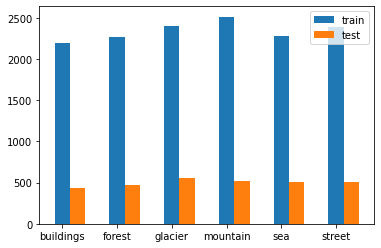

In [117]:
plt.figure(figsize=(20,20))
width=0.28
labels=['buildings', 'forest', 'glacier','mountain','sea','street']
x=np.arange(classes)
fig,ax=plt.subplots()
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.bar(x,counts_train, width, label='train')
ax.bar(x+0.28,counts_test, width, label='test')
ax.legend()

Print some images with their respective classes

In [0]:
def get_category(x):
    labels = {0:'buildings', 1:'forest', 2:'glacier',3:'mountain',4:'sea', 5:'street'}
    return labels[x]

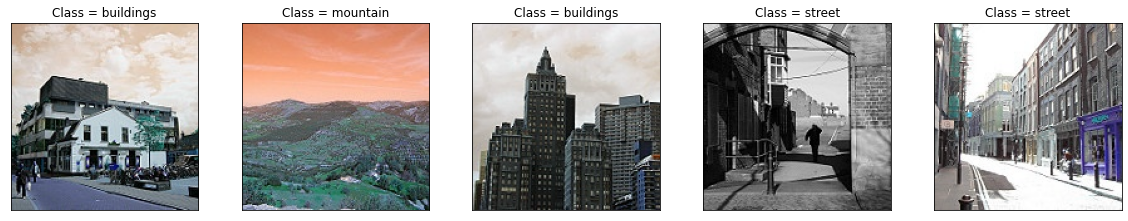

In [94]:
fig = plt.figure(figsize = (20,20))
for i in range(5):  
  index = np.random.randint(Images_train.shape[0])
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title("Class = "+get_category(Labels_train[index]))
  plt.imshow(Images[index])


# Build Models

 Firts model

*   First convolutional layer : 32 filters, filter size (3,3)
*   Second convolutional layer : 64 filters, filter size (2,2)

In [0]:
cnn_model = Sequential()
cnn_model.add(Convolution2D(32, (3,3), padding ="same", input_shape=(ImageHeight, ImageWeithg, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size= (2,2)))
cnn_model.add(Convolution2D(64, (2,2), padding ="same"))
cnn_model.add(MaxPooling2D(pool_size= (2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(classes, activation='softmax'))
cnn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [62]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 64)        8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 87616)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               22429952  
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)              

In [66]:
cnn_model.fit_generator(
    train_gen,
    steps_per_epoch=100,
    epochs=32,
    validation_data=test_gen,
    validation_steps=100
    )

Epoch 1/32
100/100 [==============================] - 118s 1s/step - loss: 0.7083 - accuracy: 0.7497 - val_loss: 0.9134 - val_accuracy: 0.6826
Epoch 2/32
100/100 [==============================] - 117s 1s/step - loss: 0.7253 - accuracy: 0.7447 - val_loss: 0.7736 - val_accuracy: 0.7274
Epoch 3/32
100/100 [==============================] - 115s 1s/step - loss: 0.6693 - accuracy: 0.7596 - val_loss: 0.6163 - val_accuracy: 0.7782
Epoch 4/32
100/100 [==============================] - 117s 1s/step - loss: 0.6770 - accuracy: 0.7541 - val_loss: 0.5861 - val_accuracy: 0.7898
Epoch 5/32
100/100 [==============================] - 113s 1s/step - loss: 0.6881 - accuracy: 0.7563 - val_loss: 0.6946 - val_accuracy: 0.7444
Epoch 6/32
100/100 [==============================] - 111s 1s/step - loss: 0.6760 - accuracy: 0.7584 - val_loss: 0.6336 - val_accuracy: 0.7832
Epoch 7/32
100/100 [==============================] - 110s 1s/step - loss: 0.6781 - accuracy: 0.7605 - val_loss: 0.7731 - val_accuracy: 0.7400